## Libraries

In [20]:
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from utils.data_preprocessing import DataPreparer, DataSplitter, DataScaler
from src.config import Config

# Data

In [21]:
config = Config()
df = pd.read_csv("../output/0_data_cleaning/2_cleaned_data_45_countries.csv")
df

,country,year,population,gdp,temperature_change_from_co2,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,co2_including_luc
0,Argentina,1928,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,241.697
1,Argentina,1929,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,242.878
2,Argentina,1930,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,194.678
3,Argentina,1931,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,163.215
4,Argentina,1932,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,145.940
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,Vietnam,2018,94914328.0,6.815014e+11,0.005,49.637,122.121,1.373,18.554,247.029,66.036,504.751
3995,Vietnam,2019,95776712.0,7.316531e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,589.843
3996,Vietnam,2020,96648680.0,7.526296e+11,0.006,60.066,215.817,1.257,16.931,249.736,69.272,613.079
3997,Vietnam,2021,97468024.0,7.719120e+11,0.006,62.071,211.893,0.995,13.757,252.922,63.838,605.475


1. Feautre engineering

In [22]:
# Add indexes
df[config.additional_index] = df["country"]
df = df.set_index([config.year_index, config.additional_index])

In [23]:
data_preparer = DataPreparer()
arimax_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index)
arimax_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2_including_luc
year,country_index,,,,,,,,,,
1929,Argentina,11443159.0,8.069191e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94914328.0,6.815014e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,504.751
2019,Vietnam,95776712.0,7.316531e+11,0.006,49.637,122.121,1.373,18.554,247.029,66.036,589.843
2020,Vietnam,96648680.0,7.526296e+11,0.006,56.538,191.443,1.453,18.906,248.054,73.449,613.079


In [24]:
lightgbm_df = data_preparer.create_arimax_lightgbm_data(df, config.additional_index, num_lags=3)
lightgbm_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,cement_co2_lag_2,cement_co2_lag_3,coal_co2_lag_1,coal_co2_lag_2,coal_co2_lag_3,flaring_co2_lag_1,...,gas_co2_lag_1,gas_co2_lag_2,gas_co2_lag_3,land_use_change_co2_lag_1,land_use_change_co2_lag_2,land_use_change_co2_lag_3,oil_co2_lag_1,oil_co2_lag_2,oil_co2_lag_3,co2_including_luc
year,country_index,,,,,,,,,,,,,,,,,,,,,
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,0.174,0.116,8.119,8.321,8.284,0.000,...,0.454,0.458,0.297,181.910,229.748,228.958,4.005,4.177,4.041,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,0.189,0.174,6.947,8.119,8.321,0.000,...,0.564,0.454,0.458,150.371,181.910,229.748,5.067,4.005,4.177,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,0.265,0.189,6.331,6.947,8.119,0.000,...,0.769,0.564,0.454,132.840,150.371,181.910,5.752,5.067,4.005,134.144
1934,Argentina,12663847.0,7.865958e+10,0.004,0.254,0.247,0.265,5.959,6.331,6.947,0.000,...,1.034,0.769,0.564,120.912,132.840,150.371,5.985,5.752,5.067,126.606
1935,Argentina,12887227.0,8.212502e+10,0.004,0.280,0.254,0.247,6.581,5.959,6.331,0.000,...,1.249,1.034,0.769,112.366,120.912,132.840,6.130,5.985,5.752,119.507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Vietnam,94914328.0,6.815014e+11,0.005,42.735,36.822,34.298,108.222,106.855,97.816,1.733,...,17.877,20.368,20.463,254.245,156.405,211.867,59.076,57.593,61.067,504.751
2019,Vietnam,95776712.0,7.316531e+11,0.006,49.637,42.735,36.822,122.121,108.222,106.855,1.373,...,18.554,17.877,20.368,247.029,254.245,156.405,66.036,59.076,57.593,589.843
2020,Vietnam,96648680.0,7.526296e+11,0.006,56.538,49.637,42.735,191.443,122.121,108.222,1.453,...,18.906,18.554,17.877,248.054,247.029,254.245,73.449,66.036,59.076,613.079


In [25]:
lstm_df = data_preparer.create_lstm_data(df, config.year_range, config.additional_index)
lstm_df

,,country_t-3,population_t-3,gdp_t-3,temperature_change_from_co2_t-3,cement_co2_t-3,coal_co2_t-3,flaring_co2_t-3,gas_co2_t-3,land_use_change_co2_t-3,oil_co2_t-3,...,gdp_t-1,temperature_change_from_co2_t-1,cement_co2_t-1,coal_co2_t-1,flaring_co2_t-1,gas_co2_t-1,land_use_change_co2_t-1,oil_co2_t-1,co2_including_luc_t+1,co2_including_luc_t+2
year_range,country_index,,,,,,,,,,,,,,,,,,,,,
1931-1932,Argentina,Argentina,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,...,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215,145.940
1932-1933,Argentina,Argentina,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,...,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940,134.144
1933-1934,Argentina,Argentina,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,...,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144,126.606
1934-1935,Argentina,Argentina,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,...,7.285996e+10,0.004,0.254,5.959,0.000,1.034,120.912,5.985,126.606,119.507
1935-1936,Argentina,Argentina,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,...,7.865958e+10,0.004,0.280,6.581,0.000,1.249,112.366,6.130,119.507,115.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-2018,Vietnam,Vietnam,91235504.0,5.195230e+11,0.005,32.694,78.073,1.907,19.599,355.786,49.570,...,5.930066e+11,0.005,36.822,106.855,1.566,20.368,156.405,57.593,483.888,504.751
2018-2019,Vietnam,Vietnam,92191400.0,5.558222e+11,0.005,34.298,97.816,1.818,20.463,211.867,61.067,...,6.341613e+11,0.005,42.735,108.222,1.733,17.877,254.245,59.076,504.751,589.843
2019-2020,Vietnam,Vietnam,93126528.0,5.930066e+11,0.005,36.822,106.855,1.566,20.368,156.405,57.593,...,6.815014e+11,0.005,49.637,122.121,1.373,18.554,247.029,66.036,589.843,613.079


2. Correlation matrix (ARIMAX)

<Axes: >

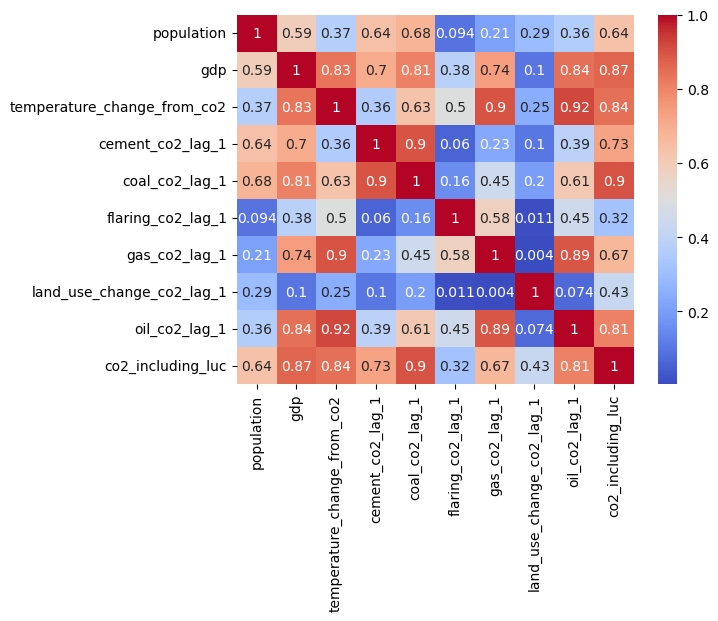

In [26]:
correlation_arimax_matrix = arimax_df.corr()
sns.heatmap(correlation_arimax_matrix, annot=True, cmap="coolwarm")

In [27]:
# Select only the independent variables (exogenous variables) for which you want to check multicollinearity
X = arimax_df.drop(columns=['co2_including_luc'], inplace = False)  # Remove the target variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

/opt/anaconda3/envs/thesis/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Feature,VIF
0,const,0.000000
1,population,2.344027
2,gdp,13.019185
3,temperature_change_from_co2,25.429801
4,cement_co2_lag_1,15.878078
5,coal_co2_lag_1,18.552298
6,flaring_co2_lag_1,1.615744
7,gas_co2_lag_1,10.363594
8,land_use_change_co2_lag_1,1.810143
9,oil_co2_lag_1,9.826484


3. Split to train and test data

In [28]:
data_splitter = DataSplitter()
train_arimax_df, test_arimax_df = data_splitter.split_data(arimax_df, config.year_index, config.additional_index)
train_arimax_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,coal_co2_lag_1,flaring_co2_lag_1,gas_co2_lag_1,land_use_change_co2_lag_1,oil_co2_lag_1,co2_including_luc
year,country_index,,,,,,,,,,
1929,Argentina,11443159.0,8.069191e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,242.878
1930,Argentina,11726853.0,7.735969e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,194.678
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144
...,...,...,...,...,...,...,...,...,...,...,...
2003,Vietnam,81475816.0,2.682029e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,227.212
2004,Vietnam,82311232.0,2.881490e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,246.341
2005,Vietnam,83142096.0,3.089886e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,206.696


In [29]:
train_lightgbm_df, test_lightgbm_df = data_splitter.split_data(lightgbm_df, config.year_index, config.additional_index)
train_lightgbm_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,cement_co2_lag_2,cement_co2_lag_3,coal_co2_lag_1,coal_co2_lag_2,coal_co2_lag_3,flaring_co2_lag_1,...,gas_co2_lag_1,gas_co2_lag_2,gas_co2_lag_3,land_use_change_co2_lag_1,land_use_change_co2_lag_2,land_use_change_co2_lag_3,oil_co2_lag_1,oil_co2_lag_2,oil_co2_lag_3,co2_including_luc
year,country_index,,,,,,,,,,,,,,,,,,,,,
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,0.174,0.116,8.119,8.321,8.284,0.000,...,0.454,0.458,0.297,181.910,229.748,228.958,4.005,4.177,4.041,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,0.189,0.174,6.947,8.119,8.321,0.000,...,0.564,0.454,0.458,150.371,181.910,229.748,5.067,4.005,4.177,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,0.265,0.189,6.331,6.947,8.119,0.000,...,0.769,0.564,0.454,132.840,150.371,181.910,5.752,5.067,4.005,134.144
1934,Argentina,12663847.0,7.865958e+10,0.004,0.254,0.247,0.265,5.959,6.331,6.947,0.000,...,1.034,0.769,0.564,120.912,132.840,150.371,5.985,5.752,5.067,126.606
1935,Argentina,12887227.0,8.212502e+10,0.004,0.280,0.254,0.247,6.581,5.959,6.331,0.000,...,1.249,1.034,0.769,112.366,120.912,132.840,6.130,5.985,5.752,119.507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Vietnam,82311232.0,2.881490e+11,0.004,9.366,8.274,6.574,31.974,27.490,24.952,1.214,...,5.206,4.100,2.565,149.950,128.197,154.469,29.501,28.636,25.564,246.341
2005,Vietnam,83142096.0,3.089886e+11,0.004,10.301,9.366,8.274,34.792,31.974,27.490,1.196,...,8.760,5.206,4.100,157.402,149.950,128.197,33.891,29.501,28.636,206.696
2006,Vietnam,83951800.0,3.294254e+11,0.004,11.983,10.301,9.366,39.458,34.792,31.974,1.152,...,9.394,8.760,5.206,110.850,157.402,149.950,33.859,33.891,29.501,189.254


In [30]:
#split data by the same amount of years in test part 2014-2022
train_lightgbm_2014_df, test_lightgbm_2014_df = data_splitter.split_data_2014_2022(lightgbm_df, config.year_index, config.additional_index)
train_lightgbm_2014_df

,,population,gdp,temperature_change_from_co2,cement_co2_lag_1,cement_co2_lag_2,cement_co2_lag_3,coal_co2_lag_1,coal_co2_lag_2,coal_co2_lag_3,flaring_co2_lag_1,...,gas_co2_lag_1,gas_co2_lag_2,gas_co2_lag_3,land_use_change_co2_lag_1,land_use_change_co2_lag_2,land_use_change_co2_lag_3,oil_co2_lag_1,oil_co2_lag_2,oil_co2_lag_3,co2_including_luc
year,country_index,,,,,,,,,,,,,,,,,,,,,
1931,Argentina,11989069.0,7.199214e+10,0.004,0.189,0.174,0.116,8.119,8.321,8.284,0.000,...,0.454,0.458,0.297,181.910,229.748,228.958,4.005,4.177,4.041,163.215
1932,Argentina,12228636.0,6.962483e+10,0.004,0.265,0.189,0.174,6.947,8.119,8.321,0.000,...,0.564,0.454,0.458,150.371,181.910,229.748,5.067,4.005,4.177,145.940
1933,Argentina,12444339.0,7.285996e+10,0.004,0.247,0.265,0.189,6.331,6.947,8.119,0.000,...,0.769,0.564,0.454,132.840,150.371,181.910,5.752,5.067,4.005,134.144
1934,Argentina,12663847.0,7.865958e+10,0.004,0.254,0.247,0.265,5.959,6.331,6.947,0.000,...,1.034,0.769,0.564,120.912,132.840,150.371,5.985,5.752,5.067,126.606
1935,Argentina,12887227.0,8.212502e+10,0.004,0.280,0.254,0.247,6.581,5.959,6.331,0.000,...,1.249,1.034,0.769,112.366,120.912,132.840,6.130,5.985,5.752,119.507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,Vietnam,86482920.0,3.896709e+11,0.004,15.363,14.063,12.258,43.642,36.463,42.744,0.976,...,13.901,12.479,11.212,105.447,115.180,89.601,40.421,37.357,32.412,305.761
2010,Vietnam,87411016.0,4.136662e+11,0.004,19.239,15.363,14.063,45.489,43.642,36.463,1.051,...,15.374,13.901,12.479,181.267,105.447,115.180,43.341,40.421,37.357,262.083
2011,Vietnam,88349104.0,4.383547e+11,0.004,23.770,19.239,15.363,47.463,45.489,43.642,0.979,...,18.049,15.374,13.901,122.519,181.267,105.447,49.303,43.341,40.421,257.453


In [31]:
train_lstm_df, test_lstm_df = data_splitter.split_data(lstm_df, config.year_range, config.additional_index)
train_lstm_df

,,country_t-3,population_t-3,gdp_t-3,temperature_change_from_co2_t-3,cement_co2_t-3,coal_co2_t-3,flaring_co2_t-3,gas_co2_t-3,land_use_change_co2_t-3,oil_co2_t-3,...,gdp_t-1,temperature_change_from_co2_t-1,cement_co2_t-1,coal_co2_t-1,flaring_co2_t-1,gas_co2_t-1,land_use_change_co2_t-1,oil_co2_t-1,co2_including_luc_t+1,co2_including_luc_t+2
year_range,country_index,,,,,,,,,,,,,,,,,,,,,
1931-1932,Argentina,Argentina,11139114.0,7.716888e+10,0.004,0.116,8.284,0.000,0.297,228.958,4.041,...,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,163.215,145.940
1932-1933,Argentina,Argentina,11443159.0,8.069191e+10,0.004,0.174,8.321,0.000,0.458,229.748,4.177,...,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,145.940,134.144
1933-1934,Argentina,Argentina,11726853.0,7.735969e+10,0.004,0.189,8.119,0.000,0.454,181.910,4.005,...,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,134.144,126.606
1934-1935,Argentina,Argentina,11989069.0,7.199214e+10,0.004,0.265,6.947,0.000,0.564,150.371,5.067,...,7.285996e+10,0.004,0.254,5.959,0.000,1.034,120.912,5.985,126.606,119.507
1935-1936,Argentina,Argentina,12228636.0,6.962483e+10,0.004,0.247,6.331,0.000,0.769,132.840,5.752,...,7.865958e+10,0.004,0.280,6.581,0.000,1.249,112.366,6.130,119.507,115.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-2004,Vietnam,Vietnam,79001144.0,2.203831e+11,0.004,5.628,20.716,1.335,3.063,269.316,23.193,...,2.506834e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,227.212,246.341
2004-2005,Vietnam,Vietnam,79817768.0,2.348463e+11,0.004,6.574,24.952,1.330,2.565,154.469,25.564,...,2.682029e+11,0.004,9.366,31.974,1.214,5.206,149.950,29.501,246.341,206.696
2005-2006,Vietnam,Vietnam,80642304.0,2.506834e+11,0.004,8.274,27.490,1.028,4.100,128.197,28.636,...,2.881490e+11,0.004,10.301,34.792,1.196,8.760,157.402,33.891,206.696,189.254


3. Preparing exogenous and target variable for arimax

3a. All columns

In [32]:
# Separate target (y) before scaling
y_train_arimax = train_arimax_df['co2_including_luc']
y_test_arimax = test_arimax_df['co2_including_luc']

y_train_arimax.to_csv('../output/0_data_cleaning/arimax/y_train_arimax.csv')
y_test_arimax.to_csv('../output/0_data_cleaning/arimax/y_test_arimax.csv')

In [33]:
# Preprocess (scale) only the exogenous variables, excluding the target
exog_train_arimax = train_arimax_df.drop(columns=['co2_including_luc'], inplace = False)
exog_test_arimax = test_arimax_df.drop(columns=['co2_including_luc'], inplace = False)

exog_train_arimax.to_csv('../output/0_data_cleaning/arimax/1_exog_train_arimax.csv')
exog_test_arimax.to_csv('../output/0_data_cleaning/arimax/1_exog_test_arimax.csv')

3b. Exogenous variables chose by using principal component analysis (PCA)

In [34]:
data_preprocessor_arimax = DataScaler()
exog_train_arimax_scaled, exog_test_arimax_scaled = data_preprocessor_arimax.preprocess_data(exog_train_arimax, exog_test_arimax)

In [35]:
# Apply PCA to the scaled exogenous variables (training data)
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance
exog_train_arimax_pca = pca.fit_transform(exog_train_arimax_scaled)
exog_test_arimax_pca = pca.transform(exog_test_arimax_scaled)

num_components = exog_train_arimax_pca.shape[1]
component_names = [f"PC{i+1}" for i in range(num_components)]

exog_train_arimax_pca_df = pd.DataFrame(exog_train_arimax_pca, columns=component_names, index=exog_train_arimax.index)
exog_test_arimax_pca_df = pd.DataFrame(exog_test_arimax_pca, columns=component_names, index=exog_test_arimax.index)

exog_train_arimax_pca_df.to_csv('../output/0_data_cleaning/arimax/2_exog_train_arimax_pca_df.csv')
exog_test_arimax_pca_df.to_csv('../output/0_data_cleaning/arimax/2_exog_test_arimax_pca_df.csv')


4. Handle Categorical Variables + Scaling (LightGBM)

In [36]:
data_preprocessor_lightgbm = DataScaler()
train_lightgbm_preprocessed, test_lightgbm_preprocessed = data_preprocessor_lightgbm.preprocess_data(train_lightgbm_df, test_lightgbm_df)

train_lightgbm_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/train_lightgbm.csv')
test_lightgbm_preprocessed.to_csv('../output/0_data_cleaning/lightgbm/test_lightgbm.csv')

In [37]:
#split data by the same amount of years in test part 2014-2022
data_preprocessor_lightgbm_2014 = DataScaler()
train_lightgbm_2014_preprocessed, test_lightgbm_2014_preprocessed = data_preprocessor_lightgbm_2014.preprocess_data(train_lightgbm_2014_df, test_lightgbm_2014_df)

train_lightgbm_2014_preprocessed.to_csv('../output/0_data_cleaning/lightgbm_2014/train_lightgbm_2014.csv')
test_lightgbm_2014_preprocessed.to_csv('../output/0_data_cleaning/lightgbm_2014/test_lightgbm_2014.csv')

5. Handle Categorical Variables + Scaling (LSTM)

In [38]:
data_preprocessor_lstm = DataScaler()
train_lstm_preprocessed, test_lstm_preprocessed = data_preprocessor_lstm.preprocess_data(train_lstm_df, test_lstm_df)

train_lstm_preprocessed.to_csv('../output/0_data_cleaning/lstm/train_lstm.csv')
test_lstm_preprocessed.to_csv('../output/0_data_cleaning/lstm/test_lstm.csv')